<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
# Импорт необходимых библиотек
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy import stats as st
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

**Описание данных**

1. Технологический процесс
    1. Rougher feed — исходное сырье
    2. Rougher additions (или reagent additions) — флотационные реагенты:
        - Xanthate — ксантогенат (промотер, или активатор флотации);
        - Sulphate — сульфат (на данном производстве сульфид натрия);
        - Depressant — депрессант (силикат натрия).
    3. Rougher process (англ. «грубый процесс») — флотация
    4. Rougher tails — отвальные хвосты
    5. Float banks — флотационная установка
    6. Cleaner process — очистка
    7. Rougher Au — черновой концентрат золота
    8. Final Au — финальный концентрат золота
2. Параметры этапов
    1. air amount — объём воздуха
    2. fluid levels — уровень жидкости
    3. feed size — размер гранул сырья
    4. feed rate — скорость подачи
3. Наименование признаков
    
    Наименование признаков должно быть такое:
    [этап].[тип_параметра].[название_параметра]
    
    Пример: rougher.input.feed_ag
4. Возможные значения для блока [этап]:
    1. rougher — флотация
    2. primary_cleaner — первичная очистка
    3. secondary_cleaner — вторичная очистка
    4. final — финальные характеристики
5. Возможные значения для блока [тип_параметра]:
    1. input — параметры сырья
    2. output — параметры продукта
    3. state — параметры, характеризующие текущее состояние этапа
    4. calculation — расчётные характеристики

Данные индексируются датой и временем получения информации (признак `date`). Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

**Открытие данных**

Выгрузим данные таблиц в следующие датафреймы:
- gold_recovery_train_new.csv - gold_recovery_train (обучающая выборка)
- gold_recovery_test_new.csv - gold_recovery_test (тестовая выборка)
- gold_recovery_full_new.csv - gold_recovery_full (исходные данные)

In [2]:
# Загрузка файла данных
'''
data_path_local_0 = 'C:/Users/Asus3/Documents/Яндекс.Практикум/projects/data/project_9/gold_recovery_train_new.csv'
data_path_local_1 = 'C:/Users/Asus3/Documents/Яндекс.Практикум/projects/data/project_9/gold_recovery_test_new.csv'
data_path_local_2 = 'C:/Users/Asus3/Documents/Яндекс.Практикум/projects/data/project_9/gold_recovery_full_new.csv'
'''
#данные локально
'''
data_path_local_0 = 'C:/Users/ruleva_ad/Desktop/projects/data/project_9/gold_recovery_train_new.csv'
data_path_local_1 = 'C:/Users/ruleva_ad/Desktop/projects/data/project_9/gold_recovery_test_new.csv'
data_path_local_2 = 'C:/Users/ruleva_ad/Desktop/projects/data/project_9/gold_recovery_full_new.csv'

'''
data_path_local_0 = 'C:/Users/Maroznik/Documents/dev/Яндекс.Практикум/projects/data/project_9/gold_recovery_train_new.csv'
data_path_local_1 = 'C:/Users/Maroznik/Documents/dev/Яндекс.Практикум/projects/data/project_9/gold_recovery_test_new.csv'
data_path_local_2 = 'C:/Users/Maroznik/Documents/dev/Яндекс.Практикум/projects/data/project_9/gold_recovery_full_new.csv'

#данные на сервере
data_path_server_0 = '/datasets/gold_recovery_train_new.csv'
data_path_server_1 = '/datasets/gold_recovery_test_new.csv'
data_path_server_2 = '/datasets/gold_recovery_full_new.csv'

#чтение из файла 
#if os.path.exists(data_path_local):
   # data = pd.read_csv(data_path_local, sep=',')
    
if (os.path.exists(data_path_local_0)
    and os.path.exists(data_path_local_1)
    and os.path.exists(data_path_local_2)):
    gold_recovery_train = pd.read_csv(data_path_local_0, sep=',')
    gold_recovery_test = pd.read_csv(data_path_local_1, sep=',')
    gold_recovery_full = pd.read_csv(data_path_local_2, sep=',')
    print('Успешное чтение файлов')
elif (os.path.exists(data_path_server_0)
    and os.path.exists(data_path_server_1)
    and os.path.exists(data_path_server_2)):
    gold_recovery_train = pd.read_csv(data_path_server_0, sep=',')
    gold_recovery_test = pd.read_csv(data_path_server_1, sep=',')
    gold_recovery_full = pd.read_csv(data_path_server_2, sep=',')
else:
    print('Путь к файлу не найден')

**Изучение данных**

In [3]:
datas = [gold_recovery_train, gold_recovery_test, gold_recovery_full]
for data in datas:
    display(data.head())
    display(data.info())  

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

В тестовых данных присутствуют только столбцы типов `input` и `state`, тогда как в тренировочном и полном датафреймах - все, включая `output` и `calculation`. `output` и `calculation` являются выходными параметрами соответствующего этапа очистки, которые можно принимать за целевые параметры прогнозирования модели. Нас будут интересовать такие выходные параметры как `rougher.output.recovery` и `final.output.recovery`, которые мы и примем за целевые для каждого из двух этапов.

Проведем тестовый расчет эффективности обогащения на обучающей выборке для этапа флотации, где:

    - C — доля золота в концентрате после флотации/очистки;
    - F — доля золота в сырье/концентрате до флотации/очистки;
    - T — доля золота в отвальных хвостах после флотации/очистки.

In [4]:
def recovery(concentrate, feed, tail):
    return (concentrate * (feed - tail) / (feed * (concentrate - tail)) * 100)
calculated_recovery = recovery(concentrate=gold_recovery_train['rougher.output.concentrate_au'],
         feed=gold_recovery_train['rougher.input.feed_au'],
         tail=gold_recovery_train['rougher.output.tail_au'])
print(f'MAE эффективности обогащения = {mean_absolute_error(gold_recovery_train["rougher.output.recovery"], calculated_recovery)}')

MAE эффективности обогащения = 9.73512347450521e-15


**Вывод**

MAE эффективности обогащения стремится к нулю, значит формула расчета и используемые данные корректны

#### Предобработка данных

В результате первичного анализа данных были обнаружены пропуски. Исходя из информации о том, что данные в соседние моменты времени несильно отличаются друг от друга, то пропуски в обучающей и тестовой выборках, а также пропуски в полном датафрейме заполним информацией из предшествующей строки, которая соответствует предыдущему контрольному моменту времени.

In [5]:
for data in datas:
    for column in data.columns:
        data[column] = data[column].fillna(method='ffill') 
    display(data.info())
    print('Количество дубликатов в таблице =', data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14149 non-null  float64
 2   final.output.concentrate_pb                         14149 non-null  float64
 3   final.output.concentrate_sol                        14149 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14149 non-null  float64
 8   final.output.tail_sol                               14149 non-null  float64


None

Количество дубликатов в таблице = 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5290 non-null   float64
 2   primary_cleaner.input.depressant            5290 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 

None

Количество дубликатов в таблице = 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19439 non-null  float64
 2   final.output.concentrate_pb                         19439 non-null  float64
 3   final.output.concentrate_sol                        19439 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19439 non-null  float64
 7   final.output.tail_pb                                19439 non-null  float64
 8   final.output.tail_sol                   

None

Количество дубликатов в таблице = 0


Пропуски устранены, дубликатов не обнаружено. Все признаки количественные.

Удалим строки, для которых целевые признаки равны нулю, поскольку это будет мешать проводить кросс-валидвцию

In [6]:
gold_recovery_train = gold_recovery_train[(gold_recovery_train['rougher.output.recovery'] != 0) & (gold_recovery_train['final.output.recovery'] != 0)]

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

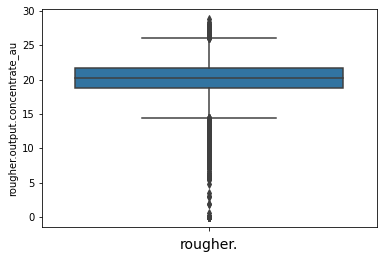

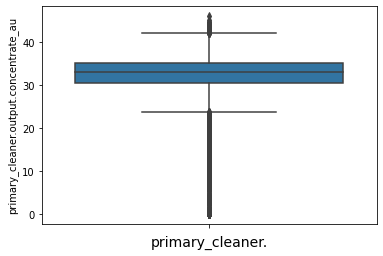

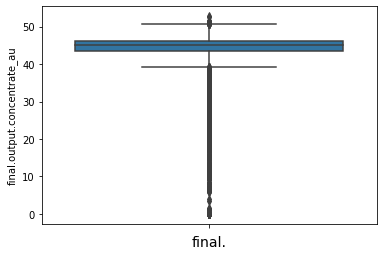

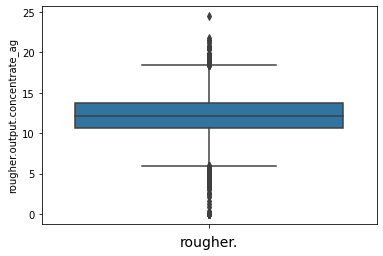

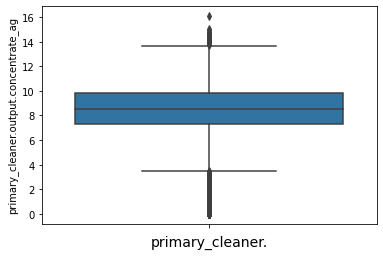

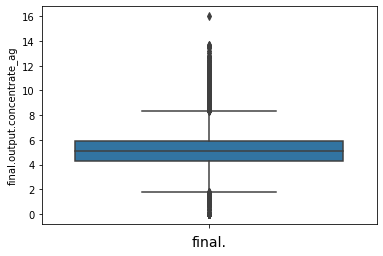

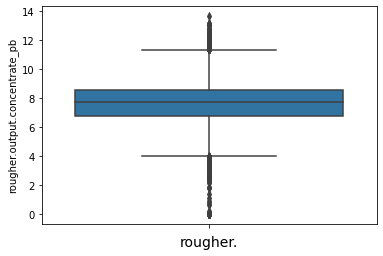

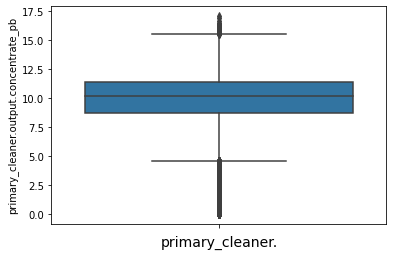

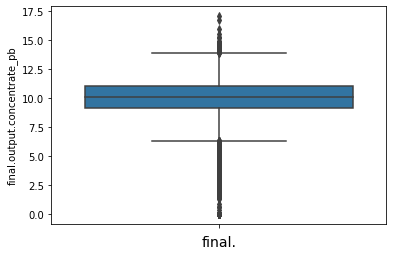

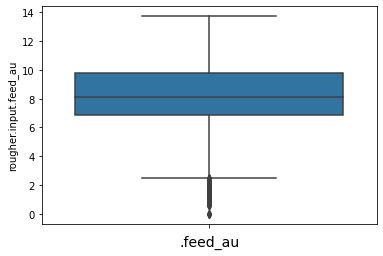

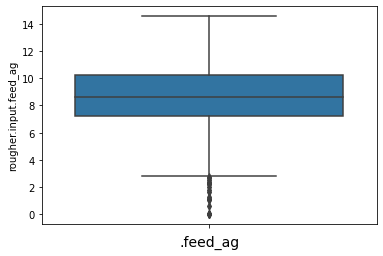

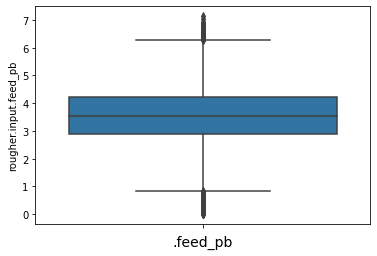

In [7]:
concentrates = ['.concentrate_au', '.concentrate_ag', '.concentrate_pb']
stages = ['rougher.', 'primary_cleaner.', 'final.']
for concentrate in concentrates:
    for stage in stages:
        column = stage + 'output' + concentrate
        boxplot = sns.boxplot(y=gold_recovery_full[column], data=gold_recovery_full)
        boxplot.set_xlabel(stage, fontsize=14)
        plt.show()    
feeds = ['.feed_au', '.feed_ag', '.feed_pb']
for feed in feeds:
    column = stages[0] + 'input' + feed
    boxplot = sns.boxplot(y=gold_recovery_full[column], data=gold_recovery_full)
    boxplot.set_xlabel(feed, fontsize=14)
    plt.show()      

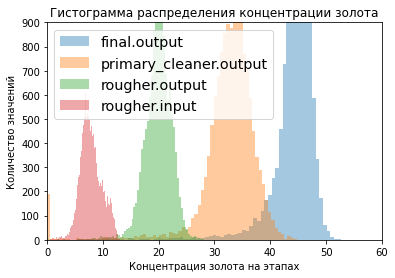

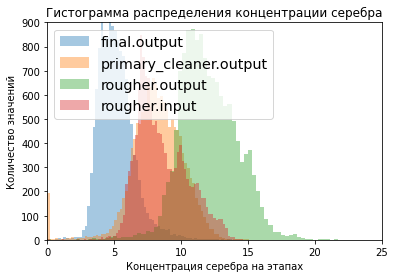

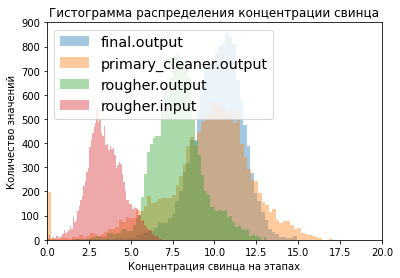

In [8]:
components = ['золота', 'серебра', 'свинца']
xlims=[[0, 60], [0, 25], [0, 20]]
for i in range(len(concentrates)):
    plt.hist(gold_recovery_train[stages[2]+'output'+concentrates[i]], bins=80, label = stages[2]+'output', alpha=.4)
    plt.hist(gold_recovery_train[stages[1]+'output'+concentrates[i]], bins=80, label = stages[1]+'output', alpha=.4)
    plt.hist(gold_recovery_train[stages[0]+'output'+concentrates[i]], bins=80, label = stages[0]+'output', alpha=.4)
    plt.hist(gold_recovery_train[stages[0]+'input'+feeds[i]], bins=80, label = stages[0]+'input', alpha=.4)   
    plt.xlim(xlims[i])
    plt.ylim([0, 900])

    plt.xlabel("Концентрация "+components[i]+" на этапах")
    plt.ylabel("Количество значений")

    plt.legend(loc='upper left', fontsize='x-large')

    plt.title("Гистограмма распределения концентрации "+components[i])
    plt.show()    

**Выводы**

`au` - медианная концентрация увеличивается начиная с 20% чуть больше чем на 10% на каждом этапе, значит доля золота увеличивается, то есть оно очищается.

`ag` - медианная концентрация уменьшается начиная с 12% примерно на 4% на каждом этапе, значит доля этой примеси уменьшается, то есть она удаляется.

`pb` - доля примеси сначала 8%, затем увеличилась до 10% и больше не росла. Это значит что на этапе флотации данная примесь удалялась хуже остальных, но на следующих этапах доля примеси не менялась.

Для каждого компанента характерно уменьшение разброса существенных значений.

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

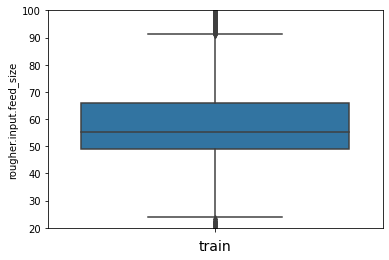

count    13795.000000
mean        60.259521
std         23.085351
min          9.659576
25%         48.988998
50%         55.335156
75%         65.967318
max        484.967466
Name: rougher.input.feed_size, dtype: float64

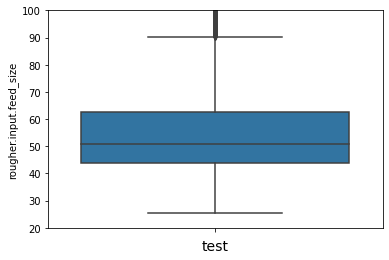

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

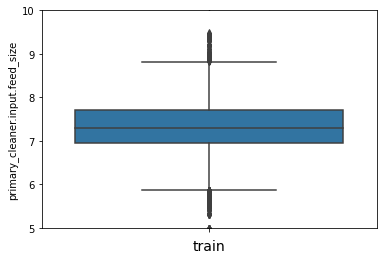

count    13795.000000
mean         7.323601
std          0.616106
min          1.080000
25%          6.960000
50%          7.300000
75%          7.700000
max         10.470000
Name: primary_cleaner.input.feed_size, dtype: float64

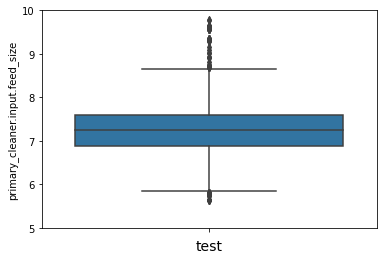

count    5290.000000
mean        7.266339
std         0.610219
min         5.650000
25%         6.890000
50%         7.250000
75%         7.600000
max        15.500000
Name: primary_cleaner.input.feed_size, dtype: float64

In [9]:
columns = [('rougher.input.feed_size', (20, 100)), ('primary_cleaner.input.feed_size', (5, 10))]
datas = [(gold_recovery_train, 'train'), (gold_recovery_test, 'test')]
for column in columns:
    for data in datas: 
        plt.ylim(column[1][0], column[1][1])   
        boxplot = sns.boxplot(y=data[0][column[0]], data=data[0])
        boxplot.set_xlabel(data[1], fontsize=14)
        plt.show()    
        display(data[0][column[0]].describe())

Распределения несильно отличаются друг от друга, оценка модели будет правильной.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


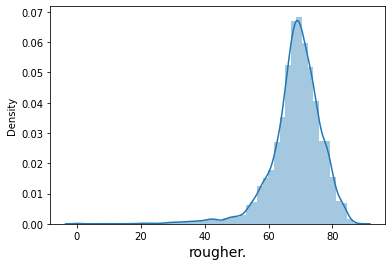

count    13795.000000
mean        68.610459
std          8.113216
min          0.040000
25%         65.248019
50%         69.310903
75%         73.508255
max         88.140119
dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


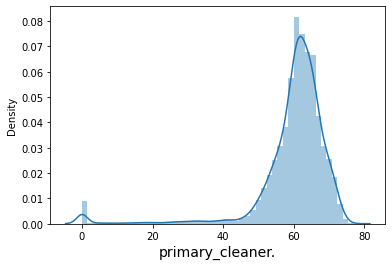

count    13795.000000
mean        60.120800
std         10.394960
min          0.000000
25%         58.039345
50%         61.730843
75%         65.305376
max         76.918076
dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


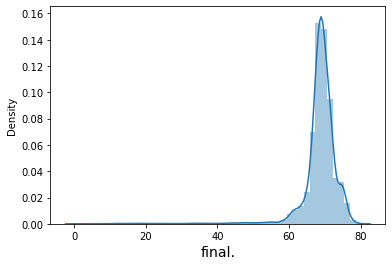

count    13795.000000
mean        68.664585
std          5.432306
min          0.040000
25%         67.559772
50%         69.136193
75%         70.953745
max         80.210644
dtype: float64

{'rougher.': 0        66.424950
 1        67.012710
 2        66.103793
 3        65.752751
 4        65.908382
            ...    
 14144    70.781325
 14145    70.539603
 14146    55.376330
 14147    69.201689
 14148    69.544003
 Length: 13795, dtype: float64,
 'primary_cleaner.': 0        72.640924
 1        72.543485
 2        72.095042
 3        59.957723
 4        71.321010
            ...    
 14144    59.001692
 14145    59.703912
 14146    59.561096
 14147    57.216686
 14148    55.748041
 Length: 13795, dtype: float64,
 'final.': 0        63.644396
 1        63.957723
 2        64.311180
 3        63.573449
 4        64.004667
            ...    
 14144    68.098589
 14145    68.274362
 14146    68.226068
 14147    68.200449
 14148    68.353154
 Length: 13795, dtype: float64}

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


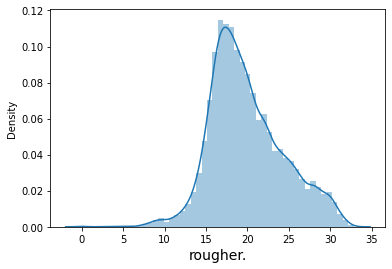

count    13795.000000
mean        19.921940
std          4.421026
min          0.030000
25%         16.822946
50%         19.155534
75%         22.583754
max         32.840164
dtype: float64

0        14.871440
1        14.905729
2        14.638299
3        14.199305
4        13.511497
           ...    
14144    16.045275
14145    15.104931
14146    14.515579
14147    14.313448
14148    14.399936
Length: 13795, dtype: float64

In [10]:
sum_concentrates = {'rougher.': 0, 'primary_cleaner.': 0, 'final.': 0}
concentrates = ['.concentrate_au', '.concentrate_ag', '.concentrate_pb', '.concentrate_sol']
stages = ['rougher.', 'primary_cleaner.', 'final.']
for stage in stages:
    columns = []
    for concentrate in concentrates:
        column = stage + 'output' + concentrate
        columns.append(column)
    sum_concentrates[stage] = gold_recovery_train[columns].sum(axis=1)
    distplot = sns.distplot(sum_concentrates[stage])
    distplot.set_xlabel(stage, fontsize=14)
    plt.show()    
    display(sum_concentrates[stage].describe())
display(sum_concentrates)
columns = []
for feed in feeds:
    column = stages[0] + 'input' + feed
    columns.append(column)
sum_feeds = gold_recovery_train[columns].sum(axis=1)
distplot = sns.distplot(sum_feeds)
distplot.set_xlabel(stages[0], fontsize=14)
plt.show()    
display(sum_feeds.describe())
display(sum_feeds)

Из распределений видно, что существует выброс на значении 0 у первичной обработки, а подавляющее большинство значений стремится к одному значению- 70%. Обнаруженную аномалию необходимо удалить из рассматриваемого датафрейма.

In [11]:
indexes = []
for i in gold_recovery_train.index:
    columns = []
    for concentrate in concentrates:
        column = 'primary_cleaner.output' + concentrate
        columns.append(column)
    if (gold_recovery_train.loc[i, columns[0]] +
        gold_recovery_train.loc[i, columns[1]] +
        gold_recovery_train.loc[i, columns[2]]
        > 0):
            indexes.append(i)
gold_recovery_train = gold_recovery_train[gold_recovery_train.index.isin(indexes)]  

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


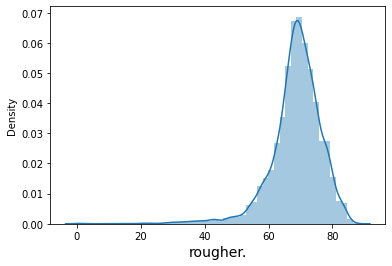

count    13725.000000
mean        68.635086
std          8.078062
min          0.040000
25%         65.274322
50%         69.312323
75%         73.515378
max         88.140119
dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


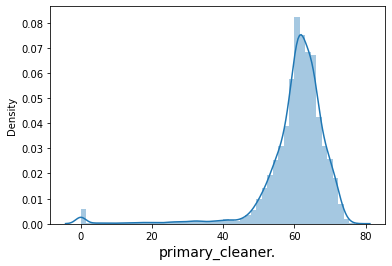

count    13725.000000
mean        60.427427
std          9.490853
min          0.040000
25%         58.122781
50%         61.774557
75%         65.320661
max         76.918076
dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


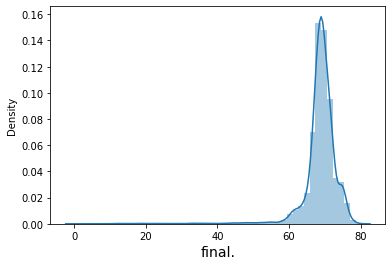

count    13725.000000
mean        68.678100
std          5.385878
min          0.040000
25%         67.567282
50%         69.136319
75%         70.950413
max         80.210644
dtype: float64

{'rougher.': 0        66.424950
 1        67.012710
 2        66.103793
 3        65.752751
 4        65.908382
            ...    
 14144    70.781325
 14145    70.539603
 14146    55.376330
 14147    69.201689
 14148    69.544003
 Length: 13725, dtype: float64,
 'primary_cleaner.': 0        72.640924
 1        72.543485
 2        72.095042
 3        59.957723
 4        71.321010
            ...    
 14144    59.001692
 14145    59.703912
 14146    59.561096
 14147    57.216686
 14148    55.748041
 Length: 13725, dtype: float64,
 'final.': 0        63.644396
 1        63.957723
 2        64.311180
 3        63.573449
 4        64.004667
            ...    
 14144    68.098589
 14145    68.274362
 14146    68.226068
 14147    68.200449
 14148    68.353154
 Length: 13725, dtype: float64}

In [12]:
for stage in stages:
    columns = []
    for concentrate in concentrates:
        column = stage + 'output' + concentrate
        columns.append(column)
    sum_concentrates[stage] = gold_recovery_train[columns].sum(axis=1)
    distplot = sns.distplot(sum_concentrates[stage])
    distplot.set_xlabel(stage, fontsize=14)
    plt.show()    
    display(sum_concentrates[stage].describe())
display(sum_concentrates)
columns = []

Обнаруженная аномалия устранена.

## Модель

Напишем функцию для расчета итоговой sMAPE

In [13]:
def smape(target, predictions):
    target_tmp = np.array(target)
    predictions_tmp = np.array(predictions)
    return abs(2*(target_tmp - predictions_tmp)/(abs(target_tmp) + abs(predictions_tmp))).sum() / len(target_tmp) * 100

def result_smape(smape_routher, smape_final):
    return 0.25 * smape_routher + 0.75 * smape_final

Обучим разные модели и оценим их качество кросс-валидацией.
Поскольку в тестовой выборке присутствуют не все признаки, то в обучающей оставим тот же набор признаков и два целевых.

In [14]:
test_columns = list(gold_recovery_test.columns)
target_test_columns = []
target_test_columns.append('rougher.output.recovery')
target_test_columns.append('final.output.recovery')
train_columns = list(gold_recovery_test.columns)
train_columns.append('rougher.output.recovery')
train_columns.append('final.output.recovery')
my_gold_recovery_train = gold_recovery_train[train_columns]
my_gold_recovery_train

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763,70.541216
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594,1000.286398,-400.065196,1600.754587,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,25.880539,-499.989656,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,69.266198
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,1599.541515,-499.827444,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,6.204633,999.719565,-400.074028,1599.337330,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,26.005245,-499.929616,23.886657,-499.951928,23.913535,-499.442343,23.957717,-499.901982,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,68.116445
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,1600.449520,-500.052575,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189,11.630094,6.203177,11.692450,6.196578

Для тестового набора данных выберем по моменту времени целевые признаки из полного набора данных

In [15]:
target_test = gold_recovery_full[gold_recovery_full['date'].isin(gold_recovery_test['date'])][target_test_columns]

Разделим в обучающей выборке признаки на обучающие и целевые. Также удалим столбец `date`, который больше не нужен и будет мешать при обучении модели. 

In [16]:
features_train = my_gold_recovery_train.drop(columns=['rougher.output.recovery', 'final.output.recovery', 'date'])
target_train = my_gold_recovery_train[target_test_columns]

In [17]:
features_test = gold_recovery_test.drop(columns=['date']).set_index(target_test.index)

In [18]:
df_test = pd.concat([features_test, target_test], axis=1)

Признаки имеют разный масштаб. Приведем их к одному.

In [19]:
scaler = StandardScaler()
scaler.fit(features_train[list(features_train.columns)])
features_train[list(features_train.columns)] = scaler.transform(features_train[list(features_train.columns)])

Для выбора гиперпараметров проведем обучение и проверку на одном разбиении подвыборки, а затем, для уточнения качества модели будем проводить кросс-валидацию.

In [20]:
my_gold_recovery_train = my_gold_recovery_train.drop(columns=['date'])
rougher_columns_flags = my_gold_recovery_train.columns.str.contains('rougher.')
final_columns_flags = my_gold_recovery_train.columns.str.contains('secondary_cleaner.')
final_columns_flags += my_gold_recovery_train.columns.str.contains('final.')
my_gold_recovery_train.columns[0]
rougher_columns_for_drop = []
final_columns_for_drop = []
for i in range(len(my_gold_recovery_train.columns)):
    if not rougher_columns_flags[i]:
        rougher_columns_for_drop.append(my_gold_recovery_train.columns[i])
    if not final_columns_flags[i]:
        final_columns_for_drop.append(my_gold_recovery_train.columns[i])

In [21]:
final_columns_for_drop

['primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rough

In [22]:
rougher_columns_for_drop

['primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'secondary_cleaner.state.floatbank2_a_air',
 'secondary_cleaner.state.floatbank2_a_level',
 'secondary_cleaner.state.floatbank2_b_air',
 'secondary_cleaner.state.floatbank2_b_level',
 'secondary_cleaner.state.floatbank3_a_air',
 'secondary_cleaner.state.floatbank3_a_level',
 'secondary_cleaner.state.floatbank3_b_air',
 'secondary_cleaner.state.floatbank3_b_level',
 'secondary_cleaner.state.floatbank4_a_air',
 'secondary_cleaner.state.floatbank4_a_level',
 'secondary_cleaner.state.floatbank4_b_air',
 

In [23]:
# функция разбиения 
def train_valid_split(data, target_column, drop_column):
    data = data.drop(drop_column, axis=1)
    data_train, data_valid = train_test_split(data, test_size=0.25, random_state=12345) 
    features_train = data_train.drop([target_column], axis=1)
    target_train = data_train[target_column]
    features_valid = data_valid.drop([target_column], axis=1)
    target_valid = data_valid[target_column]
    return features_train, target_train, features_valid, target_valid

ml_datas = train_valid_split(my_gold_recovery_train, 'rougher.output.recovery',  rougher_columns_for_drop)
features_train_rougher = ml_datas[0]
target_train_rougher = ml_datas[1]
features_valid_rougher = ml_datas[2]
target_valid_rougher = ml_datas[3]

ml_datas = train_valid_split(my_gold_recovery_train, 'final.output.recovery',  'rougher.output.recovery')
features_train_final = ml_datas[0]
target_train_final = ml_datas[1]
features_valid_final = ml_datas[2]
target_valid_final = ml_datas[3]

Для разных целевых признаков будем использовать разные обучающие наборы: для `rougher.output.recovery` - столбцы этапа `rougher` (поскольку только они влияют на черновой концентрат), для `final.output.recovery` - столбцы, доступные в тестовой выборке, потому что только на них мы можем научить тестоый вариант проверки, а до этого этапа мы доходим, пройдя все предыдущие.

**Модель линейной регрессии**

In [24]:
#Создадим счетчик smape_score
smape_score = make_scorer(smape, greater_is_better=False)

In [25]:
scores_lr_rougher = cross_val_score(LinearRegression(), features_train, target_train.drop(['final.output.recovery'], axis=1), scoring=smape_score)
mean_smape_lr_rougher = scores_lr_rougher.mean()
print("Среднее sMAPE rougher модели линейной регрессии на кросс-валидации:\n", mean_smape_lr_rougher)
scores_lr_final = cross_val_score(LinearRegression(), features_train, target_train.drop(['rougher.output.recovery'], axis=1), scoring=smape_score)
mean_smape_lr_final = scores_lr_final.mean()
print("Среднее sMAPE final модели линейной регрессии на кросс-валидации:\n", mean_smape_lr_final)
mean_result_lr = result_smape(mean_smape_lr_rougher, mean_smape_lr_final)
print("total_sMAPE модели линейной регрессии на кросс-валидации:\n", mean_result_lr)

Среднее sMAPE rougher модели линейной регрессии на кросс-валидации:
 -7.26569604756599
Среднее sMAPE final модели линейной регрессии на кросс-валидации:
 -10.950532500993136
total_sMAPE модели линейной регрессии на кросс-валидации:
 -10.02932338763635


**Модель решающего дерева**

Проведем подбор оптимальных параметров при помощи инструмента `GridSearchCV`

In [26]:
%%time
X_train_rougher = pd.concat([features_train_rougher, features_valid_rougher], ignore_index=True)
y_train_rougher = pd.concat([target_train_rougher, target_valid_rougher], ignore_index=True)
dt_rougher = DecisionTreeRegressor()
parametrs = { 'max_depth': range (12,24),
              'min_samples_leaf': range (1,12),
              'min_samples_split': range (2,14,2) }
grid_dt_rougher = GridSearchCV(dt_rougher, parametrs, scoring=smape_score, cv=5)
grid_dt_rougher.fit(X_train_rougher, y_train_rougher)
grid_dt_rougher.best_params_

CPU times: user 15min 55s, sys: 1.8 s, total: 15min 57s
Wall time: 16min 4s


{'max_depth': 17, 'min_samples_leaf': 9, 'min_samples_split': 2}

In [27]:
%%time
X_train_final = pd.concat([features_train_final, features_valid_final], ignore_index=True)
y_train_final = pd.concat([target_train_final, target_valid_final], ignore_index=True)
dt_final = DecisionTreeRegressor()
parametrs = { 'max_depth': range (12,24),
              'min_samples_leaf': range (1,12),
              'min_samples_split': range (2,14,2) }
grid_dt_final = GridSearchCV(dt_final, parametrs, scoring=smape_score, cv=5)
grid_dt_final.fit(X_train_final, y_train_final)
grid_dt_final.best_params_

CPU times: user 41min 47s, sys: 3.95 s, total: 41min 51s
Wall time: 41min 54s


{'max_depth': 13, 'min_samples_leaf': 5, 'min_samples_split': 12}

In [28]:
scores_dt_rougher = cross_val_score(
    DecisionTreeRegressor(max_depth=17, min_samples_leaf=9, min_samples_split=8), 
    X_train_rougher,
    y_train_rougher,
    scoring=smape_score)
mean_smape_dt_rougher = scores_dt_rougher.mean()
print("Среднее sMAPE rougher модели решающего дерева на кросс-валидации:\n", mean_smape_dt_rougher)
scores_dt_final = cross_val_score(
    DecisionTreeRegressor(max_depth=17, min_samples_leaf=9, min_samples_split=8), 
    X_train_final,
    y_train_final,
    scoring=smape_score)
mean_smape_dt_final = scores_dt_final.mean()
print("Среднее sMAPE final модели решающего дерева на кросс-валидации:\n", mean_smape_dt_final)
mean_result_dt = result_smape(mean_smape_dt_rougher, mean_smape_dt_final)
print("total_sMAPE модели решающего дерева на валидационной выборке:\n", mean_result_dt)

Среднее sMAPE rougher модели решающего дерева на кросс-валидации:
 -3.595118507360629
Среднее sMAPE final модели решающего дерева на кросс-валидации:
 -7.301268218397655
total_sMAPE модели решающего дерева на валидационной выборке:
 -6.374730790638398


**Модель случайного леса**

Проведем подбор оптимальных параметров при помощи инструмента `GridSearchCV`. Численность леса примем равной 50.

In [ ]:
%%time
rf_rougher = RandomForestRegressor(n_estimators=50)
grid_rf_rougher = GridSearchCV(rf_rougher, parametrs, scoring=smape_score, cv=5)
grid_rf_rougher.fit(X_train_rougher, y_train_rougher)
grid_rf_rougher.best_params_

In [ ]:
%%time
rf_final = RandomForestRegressor(n_estimators=50)
grid_rf_final = GridSearchCV(rf_final, parametrs, scoring=smape_score, cv=5)
grid_rf_final.fit(X_train_final, y_train_final)
grid_rf_final.best_params_

In [ ]:
%%time
scores_rf_rougher = cross_val_score(
    RandomForestRegressor(n_estimators=50, max_depth=22, min_samples_leaf=2, min_samples_split=2), 
    X_train_rougher,
    y_train_rougher,
    scoring=smape_score)
mean_smape_rf_rougher = scores_rf_rougher.mean()
print("Среднее sMAPE rougher модели случайного леса на кросс-валидации:\n", mean_smape_rf_rougher)
scores_rf_final = cross_val_score(
    RandomForestRegressor(n_estimators=50, max_depth=21, min_samples_leaf=3, min_samples_split=4), 
    X_train_final,
    y_train_final,
    scoring=smape_score)
mean_smape_rf_final = scores_rf_final.mean()
print("Среднее sMAPE final модели случайного леса на кросс-валидации:\n", mean_smape_rf_final)
mean_result_rf = result_smape(mean_smape_rf_rougher, mean_smape_rf_final)
print("total_sMAPE модели случайного леса на кросс-валидации:\n", mean_result_rf)

# **Вывод**

Лучше всего себя проявила модель случайного леса с гиперпараметрами:
- Depth rougher лучшей модели: 22
- Depth final лучшей модели: 23
- min_samples_leaf rougher лучшей модели: 2
- min_samples_leaf final лучшей модели: 3
- min_samples_split rougher лучшей модели: 2
- min_samples_split final лучшей модели: 4

Используем ее для проверки на тестовом наборе данных:

In [ ]:
rougher_columns_for_drop_old = rougher_columns_for_drop
rougher_columns_for_drop.pop()

In [ ]:
best_model_rf_rougher = RandomForestRegressor(n_estimators=50, max_depth=22, min_samples_leaf=2, min_samples_split=2) 
best_model_rf_rougher.fit(X_train_rougher, y_train_rougher)
predictions_valid_rougher = best_model_rf_rougher.predict(features_test.drop(rougher_columns_for_drop, axis=1))
result_rougher = smape(target_test['rougher.output.recovery'], predictions_valid_rougher)
print("sMAPE rougher лучшей модели на тестовой выборке:\n", result_rougher)
best_model_rf_final = RandomForestRegressor(n_estimators=50, max_depth=23, min_samples_leaf=3, min_samples_split=4) 
best_model_rf_final.fit(X_train_final, y_train_final)
predictions_valid_final = best_model_rf_final.predict(features_test)
result_final = smape(target_test['final.output.recovery'], predictions_valid_final)
print("sMAPE final лучшей модели на тестовой выборке:\n", result_final)
result = result_smape(result_rougher, result_final)
print("total_sMAPE лучшей модели на тестовой выборке:\n", result)

Посчитаем метрику для константной модели, предсказывающей медиану по целевому признаку

In [ ]:
predictions_valid_rougher_const = pd.Series(target_test['rougher.output.recovery'].median(), target_test.index)
result_rougher_const = smape(target_test['rougher.output.recovery'], predictions_valid_rougher_const)
print("sMAPE rougher константной модели на тестовой выборке:\n", result_rougher_const)
predictions_valid_final_const = pd.Series(target_test['final.output.recovery'].median(), target_test.index)
result_final_const = smape(target_test['final.output.recovery'], predictions_valid_final_const)
print("sMAPE final константной модели на тестовой выборке:\n", result_final_const)
result_const = result_smape(result_rougher_const, result_final_const)
print("total_sMAPE константной модели на тестовой выборке:\n", result_const)

## Выводы

В результате работы были рассмотрены и обучены три типа моделей, а именно линейной регрессии, решающего дерева и случайного леса, прогнозирующие целевые признаки. В результате подбора оптимальных гиперпараметров моделей и проведения кросс-валидации на обучающей выборке данных, был сделан выбор в пользу модели случайного леса, как наиболее точно предсказывающей целевые признаки, со следующими гиперпараметрами:
- Depth rougher лучшей модели: 22
- Depth final лучшей модели: 21
- min_samples_leaf rougher лучшей модели: 2
- min_samples_leaf final лучшей модели: 3
- min_samples_split rougher лучшей модели: 2
- min_samples_split final лучшей модели: 4

Средняя точность при кросс-валидации на обучающей выборке составила:
- Среднее sMAPE rougher модели случайного леса на кросс-валидации: -2.8462263840448965
- Среднее sMAPE final модели случайного леса на кросс-валидации: -5.867161019246967
- total_sMAPE модели случайного леса на кросс-валидации: -5.111927360446449

При проверке модели на тестовой выборке получили следующие результаты:
- sMAPE rougher лучшей модели на тестовой выборке: 8.04690814732713
- sMAPE final лучшей модели на тестовой выборке: 9.808280536467105
- total_sMAPE лучшей модели на тестовой выборке: 9.36793743918211

При проверке константной модели на тестовой выборке получили следующие результаты:
- sMAPE rougher константной модели на тестовой выборке: 8.057101238441547
- sMAPE final константной модели на тестовой выборке: 9.166961951380861
- total_sMAPE константной модели на тестовой выборке: 8.889496773146032

Полученные показатели точности для тестовой выборки можно считать неприемлимыми для данной работы, поскольку они хуже предсказаний константной модели. Необходимо искать другие модели, способные улучшить показатели точности на тестовой выборке

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [ ]  Выполнен шаг 1: данные подготовлены
    - [ ]  Проверена формула вычисления эффективности обогащения
    - [ ]  Проанализированы признаки, недоступные в тестовой выборке
    - [ ]  Проведена предобработка данных
- [ ]  Выполнен шаг 2: данные проанализированы
    - [ ]  Исследовано изменение концентрации элементов на каждом этапе
    - [ ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [ ]  Исследованы суммарные концентрации
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [ ]  Написана функция для вычисления итогового *sMAPE*
    - [ ]  Обучено и проверено несколько моделей
    - [ ]  Выбрана лучшая модель, её качество проверено на тестовой выборке